---
## **TEHREEM ZUABIR**
## **BYTEWISE FELLOWSHIP**
## **MINI PROJECT - DATA ANALYSIS**
---

In this project we will be analyzing the data obtained from a university enrolLment system. 
The university is offering the courses both online and oncampus. and want us to analyze how these course types affect the enrollment of students. We are also provided with further information like the prescore and post score and departmnet and any kind of pre-requisite required for the course. 


### **APPROACH:**
The approach that we will take us to the reults is :
- First we will load the dataframe.
- Then we will clean our data and ensure that data is in required foramt.
- Thirdly we will visualize our dataframe and gain valuable insight from it to conclude our results.

Let's start wth the project!

**First we import the important libraries that we wil need.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---
## **LOAD THE DATAFRAME**

In [2]:
df = pd.read_csv('/kaggle/input/courses/university_enrollment_(Mini-project-01).csv')
df.head()

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,1,classroom,2018,165,28.14,73.0,Beginner,Science
1,2,classroom,2020,175,79.68,86.0,NaN,Science
2,3,online,2016,257,57.24,80.0,NaN,Mathematics
3,4,online,2013,251,97.67,75.0,Beginner,Technology
4,5,classroom,2019,165,39.75,76.0,Beginner,Science


### **Setting the index column**
As the course_id column is the column that uniquely identifies each row in the dataframe, so let's set it as the index column.

In [3]:
df.set_index('course_id', inplace = True)
df.head()

,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
course_id,,,,,,,
1,classroom,2018,165,28.14,73.0,Beginner,Science
2,classroom,2020,175,79.68,86.0,NaN,Science
3,online,2016,257,57.24,80.0,NaN,Mathematics
4,online,2013,251,97.67,75.0,Beginner,Technology
5,classroom,2019,165,39.75,76.0,Beginner,Science


In [4]:
# Now let's check the shape of our dataframes
df.shape

(1850, 7)

---
## **CORRECTING DATATYPES**

In [5]:
df.dtypes

course_type          object
year                  int64
enrollment_count      int64
pre_score            object
post_score          float64
pre_requirement      object
department           object
dtype: object

So the above output shows that the columns **course_type, enrollment_count, post_score, pre_requirement, department** has correct datatypes.

But the datatype of year, pre_score should be corrected.
1. The **year** column should be converted to datetime format. It would be helpful if the column is in datetime format asit will be easire to see the trends over tim.
2. **pre_score** should bein float datatype because it is a numerical column.

In [6]:
# converting year column to datetime format
df['year'] = pd.to_datetime(df['year'], format = '%Y')
df.dtypes

course_type                 object
year                datetime64[ns]
enrollment_count             int64
pre_score                   object
post_score                 float64
pre_requirement             object
department                  object
dtype: object

In [7]:
# converting pre_score column datatype to float
#df['pre_score'] = df['pre_score'].astype(float)

### **Eliminating '-' character from pre_score Column**
- When converting the datatype of pre_score column I have countered another problem that is the pre_score column contains '-' string at some rows so we'll have to cater that also.

- First let's check where '-' is present in the dataframe.

In [8]:
df[df['pre_score'] == '-'].head()

,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
course_id,,,,,,,
16,online,2013-01-01,256,-,86.0,NaN,Mathematics
23,online,2015-01-01,236,-,72.0,Intermediate,Mathematics
27,online,2014-01-01,251,-,80.0,NaN,Science
28,online,2016-01-01,251,-,83.0,NaN,Science
32,online,2013-01-01,261,-,96.0,NaN,Technology


Now to cater with this issue what we can do is that:

1. First convert the column to numerical form using pd.to_numeric method and coerce the errors that will raise bacause of the presence of '-' string. After converting to numerical form the rows with '-' character will be replaceb by missing value.
2. After that I will group the dataframe by category and calcualte the mean pre_score of each category.
3. Then I will replace the missing values with the corresponding mean value.

**A second approach can be to drop all the rows with '-' string. But that will result in the loss of the data that can affect our results.**


In [9]:
# Step 1
df['pre_score'] = pd.to_numeric(df['pre_score'], errors = 'coerce')

In [10]:
# Step 2
mean_pre_score = df.groupby('course_type')['pre_score'].transform('mean')

In [11]:
mean_pre_score

course_id
1       50.403529
2       50.403529
3       49.224280
4       49.224280
5       50.403529
          ...    
1846    50.403529
1847    49.224280
1848    49.224280
1849    49.224280
1850    49.224280
Name: pre_score, Length: 1850, dtype: float64

In [12]:
# Step 3: Fill the missing values in 'pre_score' with the calculated mean
df['pre_score'] = df['pre_score'].fillna(mean_pre_score)

In [13]:
df.dtypes

course_type                 object
year                datetime64[ns]
enrollment_count             int64
pre_score                  float64
post_score                 float64
pre_requirement             object
department                  object
dtype: object

The Data types have been corrected. Now let's handle the missing values.

---
## **CHECKING CATEGORICAL COLUMNS**
Now let's check the categories present in each categorical column.

In [14]:
df['department'].value_counts()

department
Technology     719
Science        472
Mathematics    220
Math           220
Engineering    219
Name: count, dtype: int64

- In the department column we can clearly see that there is an anomaly. 
- There are two departments named MAth and Mathematics these two should fall in the same category.
- So we replace the rows with Department written as 'Math' with Mathematics.

In [15]:
# Replace 'Maths' with 'Mathematics' in the 'department' column
df.loc[df['department'] == 'Math', 'department'] = 'Mathematics'

In [16]:
df['department'].value_counts()

department
Technology     719
Science        472
Mathematics    440
Engineering    219
Name: count, dtype: int64

The 220 rows of Maths department have been now added to Mathematics department.

Now we check the values of course_type and pre_requirement column.

In [17]:
df['course_type'].value_counts()

course_type
online       1375
classroom     475
Name: count, dtype: int64

In [18]:
df['pre_requirement'].value_counts()


pre_requirement
Beginner        654
Intermediate    305
Name: count, dtype: int64

The data in pre_requirement and course_type column is fine and doesnot need any modification.

---
## **HANDLING MISSING VALUES**

To handle missing values first we need to check how many missing values are present in each column of dataframe.

In [19]:
# First lets check missing values
df.isnull().sum()

course_type           0
year                  0
enrollment_count      0
pre_score             0
post_score          185
pre_requirement     891
department            0
dtype: int64

We have some missing values in the **post_score** and **pre_requisite** column. 

- One approach can be to drop these rows but it will result in the loss of data especially if we delete the rows of the **pre_requisite** column.
- So we will follow another approach in which we will replace the missing values with some value that we will infer from our data.


### **Handling Missing values of 'Post Score'**
First let's handle the **post_score.**

For filing the missing values of post_score column I will be using the same apprach as the pre_score column that is:
   1. First group the dataframe by course_type and calculate the mean post score.
   2. Fill the missing values with the correspondig missing value.

In [20]:
# Step 1
mean_post_score = df.groupby('course_type')['post_score'].transform('mean')

In [21]:
# Step 2
df['post_score'] = df['post_score'].fillna(mean_post_score)

In [22]:
df.isnull().sum()

course_type           0
year                  0
enrollment_count      0
pre_score             0
post_score            0
pre_requirement     891
department            0
dtype: int64

### **Handling Missing values of 'Pre_requirement'**
Now to cater the missing values of pre_requirements we need to decide how to replace the missing values. 

**OPTION 1:**
- One approach would be to drop all the missing values. 
- But there are 891 rows that have missing values while oue total rows are 1850. So we cant just remove them.

**OPTION 2:**
- Second option can be to replace the missing values with the most occuring value in the column, if the count of 'Beginner' is more than intermediate replace missing values with 'intermediate'. 
- But in this case our data will become biased to a pre-requirement with which it is being replaced.

**OPTION 3:**
A third option is a rather a more better way to remove the missing values. The approach is:
       
   **1. We first group our dataframe with respect to the course_type column and count the values in the pre_requisite column for each course_tye.**
   
   In this way we will get information about how many intermediate and beginner courses are being offered in classroom and online course type.
   
   **2. Then we calculate te ratio of Beginner to Intermediate courses and replace missing values according to that ratio.**
   
   **For example**, If we have 64 Beginner level courses and 32 Intermediate level courses in online course type then the ratio becomes 2:1 so we replace two rows with Beginner and 1 row with intermediate, as it will maintain the original distribution of our data.

In [23]:
prerequisite_counts = df.groupby('course_type')['pre_requirement'].value_counts(dropna=False).unstack(fill_value=0)

In [24]:
prerequisite_counts

pre_requirement,Beginner,Intermediate,NaN
course_type,,,
classroom,192,171,112
online,462,134,779


In [25]:
# make a dict of Ratios for each course type
ratios = {
    'classroom': {'Beginner': 192, 'Intermediate': 171, 'NaN': 112},
    'online': {'Beginner': 462, 'Intermediate': 134, 'NaN': 779}
}

In [26]:
# Calculate the number of missing values to fill for each department
for course_type, ratio in ratios.items():
    if course_type in df['course_type'].values:
        num_missing = df[(df['course_type'] == course_type) & (df['pre_requirement'].isna())].shape[0]
        total_ratio = ratio['Beginner'] + ratio['Intermediate']
        num_beginner = int(num_missing * (ratio['Beginner'] / total_ratio))
        num_intermediate = num_missing - num_beginner

        # Fill missing values
        df.loc[(df['course_type'] == course_type) & (df['pre_requirement'].isna()), 'pre_requirement'] = (
            ['Beginner'] * num_beginner + ['Intermediate'] * num_intermediate
        )

In the above code a line by line description of how this code will work is given below:

1. The for loop will enumerate for each item in the dictionary.
2. Then I have added an if calse to ensure that the course type that we are currently processing is present in the datframe or not.
3. Then we extracted te missing rows count from the prerequisite_counts dataframe.
4. Then I have calcualted the ratio by which entries will be filled.
5. Now that we have calculated the ratio now we have to fill the rows with missing values.
For this I have used this code:
        
        df.loc[(df['course_type'] == course_type) & (df['pre_requirement'].isna()), 'pre_requirement'] = (
            ['Beginner'] * num_beginner + ['Intermediate'] * num_intermediate)

    - This line fills the missing values in the pre_requirement column for the current course_type.
    - df.loc[(df['course_type'] == course_type) & (df['pre_requirement'].isna()), 'pre_requirement'] selects the rows where course_type matches the current course_type and pre_requirement is NaN.
    - Then  ['Beginner'] * num_beginner + ['Intermediate'] * num_intermediate creates a list with num_beginner "Beginner" entries and num_intermediate "Intermediate" entries.
    - This list is assigned to the selected rows, filling the missing values accordingly.

In [27]:
prerequisite_counts2 = df.groupby('course_type')['pre_requirement'].value_counts(dropna=False).unstack(fill_value=0)
prerequisite_counts2

pre_requirement,Beginner,Intermediate
course_type,,
classroom,251,224
online,1065,310


In the above output we can clearly see that the missing values has been removes while the ratios has been preserved.

In [28]:
df.isnull().sum()

course_type         0
year                0
enrollment_count    0
pre_score           0
post_score          0
pre_requirement     0
department          0
dtype: int64

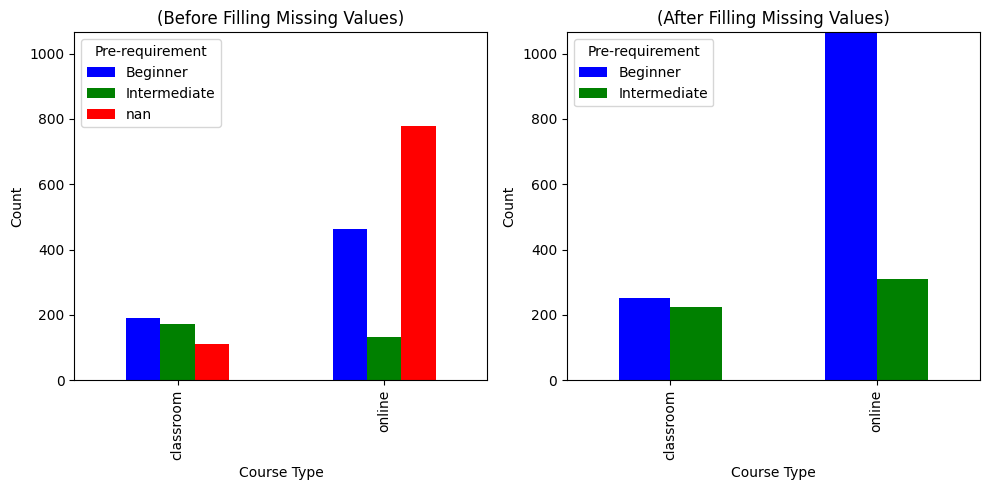

In [29]:
# Plotting histograms to compare the data
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# First histogram (before filling missing values)
prerequisite_counts.plot(kind='bar', ax=axes[0], color=['b', 'g', 'r'])
axes[0].set_xlabel('Course Type')
axes[0].set_ylabel('Count')
axes[0].set_title('(Before Filling Missing Values)')
axes[0].legend(title='Pre-requirement')

# Second histogram (after filling missing values)
prerequisite_counts2.plot(kind='bar', ax=axes[1], color=['b', 'g'])
axes[1].set_xlabel('Course Type')
axes[1].set_ylabel('Count')
axes[1].set_title('(After Filling Missing Values)')
axes[1].legend(title='Pre-requirement')

# Set the y-axis limits to be the same for both plots
y_max = max(prerequisite_counts.max().max(), prerequisite_counts2.max().max())
axes[0].set_ylim(0, y_max)
axes[1].set_ylim(0, y_max)

plt.tight_layout()
plt.show()

From the above dirtibution we can clearly see that our distribution has not changed before and after removing the missing values form dataframe. This means our approach was good for removing the missing values as it has not affected our data.

Now the data has been cleaned so now its time for data analysis!

In [30]:
# Save the cleaned data
df.to_csv('/kaggle/working/DATA.csv', index=False)  # index=False prevents the index from being written in the file

In [31]:
df.head()

,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
course_id,,,,,,,
1,classroom,2018-01-01,165,28.14,73.0,Beginner,Science
2,classroom,2020-01-01,175,79.68,86.0,Beginner,Science
3,online,2016-01-01,257,57.24,80.0,Beginner,Mathematics
4,online,2013-01-01,251,97.67,75.0,Beginner,Technology
5,classroom,2019-01-01,165,39.75,76.0,Beginner,Science


---
## **DATA ANALYSIS**
In this section we will be visualizing how different factors affect the enrollment of students in classroom and online course_types.

First let's visualize the trend of enrollment count over the years for classroom and online course types. It will help us analyze which mode us studying is becoming more preferable over the time.

First let's subset the rows according to course type.

In [32]:
# Subset the dataframe for course type
classroom_data = df[df['course_type'] == 'classroom']
online_data = df[df['course_type'] == 'online']

In the above dataframes created classroom_data has all ros where course_type is classroom, whereas online_data has all the rows where course_type is online.

In [33]:
classroom_data.head()

,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
course_id,,,,,,,
1,classroom,2018-01-01,165,28.14,73.0,Beginner,Science
2,classroom,2020-01-01,175,79.68,86.0,Beginner,Science
5,classroom,2019-01-01,165,39.75,76.0,Beginner,Science
10,classroom,2016-01-01,180,83.53,79.0,Beginner,Engineering
11,classroom,2022-01-01,180,9.84,74.0,Beginner,Engineering


In [34]:
online_data.head()

,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
course_id,,,,,,,
3,online,2016-01-01,257,57.24,80.0,Beginner,Mathematics
4,online,2013-01-01,251,97.67,75.0,Beginner,Technology
6,online,2014-01-01,246,50.10,76.0,Beginner,Mathematics
7,online,2021-01-01,241,87.83,84.0,Beginner,Science
8,online,2018-01-01,261,76.48,88.0,Beginner,Technology


### **Visualizing Enrollment trends over the years**
Let's make a time-series scatter plot to see the trend of studying over time.

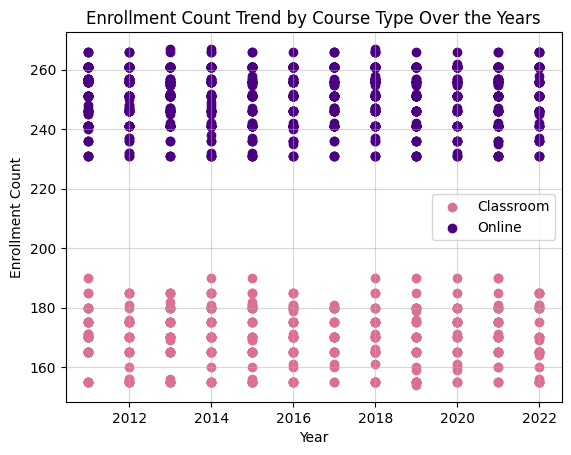

In [35]:
plt.scatter(classroom_data['year'], classroom_data['enrollment_count'], label='Classroom', color='palevioletred')
plt.scatter(online_data['year'], online_data['enrollment_count'], label='Online', color='indigo')
# Adding titles and labels
plt.title('Enrollment Count Trend by Course Type Over the Years')
plt.xlabel('Year')
plt.ylabel('Enrollment Count')
plt.legend()
# Show plot
plt.grid(True, alpha = 0.5)
plt.show()

From the above plot we can clearly see that:

**- The enrollment trend has reamined almost unchanged from the year 2011 to 2022.**

**- But the enrollment count for online courses is more than the clasroom classes.**

**- Thus we can conclude that more students are intereseted in taking online courses than classroom courses.**

### **Enrollment Count by Department - Classroom vs Online Data**
Now let's analyze the enrollment of students in classroom and online courses in all the departments.

In this plot we will be analyzing that in which departments students are more wiling to take courses online and in which departments students are willing to take courses in classrooms.

We will analyze the data over the years based on the enrollment count for each department in both classroom and online classes.

But first let's group our data for the plot.
- I have already made the separate dataframes for classroom courses and online courses.
- We will group classroom_data, online_data dataframes in such a way that they have the sum of enrollment count for every year.

In [36]:
# Group by department and year, summing up the enrollment counts
classroom_grouped = classroom_data.groupby(['department', classroom_data['year'].dt.year])['enrollment_count'].sum().unstack()
online_grouped = online_data.groupby(['department', online_data['year'].dt.year])['enrollment_count'].sum().unstack()

In [37]:
classroom_grouped.head()

year,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
department,,,,,,,,,,,,
Engineering,2101,680,2090,2610,1761,1570,2091,1420,2120,1780,2281,1421
Mathematics,872,861,871,2261,1762,2083,1711,842,1198,1171,1041,850
Science,2960,2778,2601,2125,2911,2125,1485,2426,2910,1825,2505,2405
Technology,720,1770,2100,1595,720,1410,350,1575,855,1060,1030,1265


- Now you can we that the classroom_grouped has the sum of the enrollment count for each department over the years from 2011 to 2022 for the classroom courses. 
- The same process has been followed for online data.
- Now to make a comparison of both data we need to have a common scale so that we can clearly diferentiate between both of them.
- For that I have normalized my enrollment count for both classroom data and online data.

In [38]:
# Normalize the data using Pandas
classroom_grouped_normalized = (classroom_grouped - classroom_grouped.min()) /(classroom_grouped.max() - classroom_grouped.min())
online_grouped_normalized = (online_grouped - online_grouped.min()) / (online_grouped.max() - online_grouped.min())

In [39]:
online_grouped_normalized.head()

year,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
department,,,,,,,,,,,,
Engineering,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mathematics,0.452547,0.542761,0.624907,0.433408,0.283734,0.410873,0.330677,0.525027,0.536670,0.458057,0.481481,0.412388
Science,0.391259,0.318784,0.515370,0.268010,0.492614,0.469549,0.208386,0.194598,0.476273,0.146623,0.359477,0.255219
Technology,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- Now that we have gained the normalized counts for both online and calssroom data it is time to plot them.
- Here I have ued a simple bar chart to plot the data.

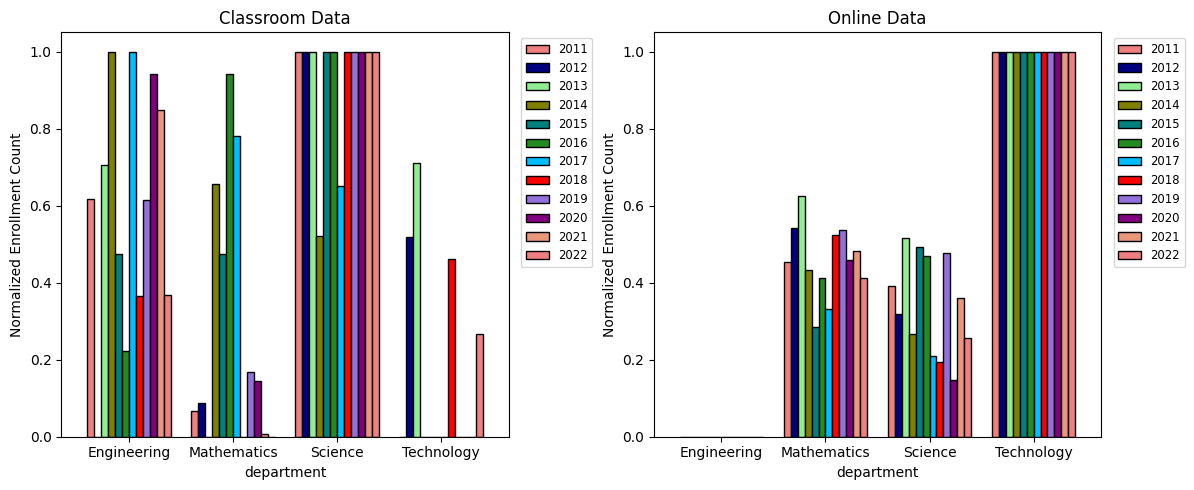

In [40]:
# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharex=True)
colors = ['lightcoral', 'navy', 'lightgreen', 'olive', 'teal', 'forestgreen', 'deepskyblue','red', 'mediumpurple', 'purple', 'darksalmon']

# Plot for classroom data
classroom_grouped_normalized.plot(kind='bar', ax=ax1, width=0.8, 
                                  edgecolor='black', color = colors)
ax1.set_title('Classroom Data')
ax1.set_ylabel('Normalized Enrollment Count')
ax1.set_xticklabels(classroom_grouped_normalized.index, rotation=0)  # Adjust x tick labels with rotation

# Plot for online data
online_grouped_normalized.plot(kind='bar', ax=ax2, width=0.8, 
                               edgecolor='black', color = colors)
ax2.set_title('Online Data')
ax2.set_ylabel('Normalized Enrollment Count')
ax2.set_xticklabels(online_grouped_normalized.index, rotation=0)  # Adjust x tick labels with rotation


# Customize legend size and rotation
ax1.legend(fontsize='small', loc='upper right', bbox_to_anchor=(1.2, 1))
ax2.legend(fontsize='small', loc='upper right', bbox_to_anchor=(1.2, 1))


plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.tight_layout()
plt.show()


From the above data we can clearly infer that:

**1. In courses like Engineering and Science more people are willing to take the classroom classes.**

**2. But The Technology Department courses people are more wiling to take the online courses.**

**3. In the department of Mathematics the trend of taking classroom calsses increased in the year from 2014-2017 but after and before that it decreased to very low level and till present people are more willing to take Online calsses for Maths also.**


### **Pre-Score and Post-Score Comparison**
Now let's compare the pre-score and post-score for every department in both Calssroom data and online data. It will help us to understand which mode of studying give better results i.e. online or classroom.

For making the comparison I have grouped the classroom data and online data for every department and have calculated then mean-pre score and post-score.

In [41]:
# Aggregate by department for classroom data
classroom_mean_scores = classroom_data.groupby('department')[['pre_score', 'post_score']].mean()

# Aggregate by department for online data
online_mean_scores = online_data.groupby('department')[['pre_score', 'post_score']].mean()


In [42]:
classroom_mean_scores

,pre_score,post_score
department,,
Engineering,54.706146,75.395692
Mathematics,49.687641,74.850816
Science,48.230816,75.373890
Technology,49.346772,75.571806


In [43]:
online_mean_scores

,pre_score,post_score
department,,
Engineering,46.179954,74.858156
Mathematics,48.213183,74.950000
Science,49.921001,74.928571
Technology,49.907506,75.441130


After getting the grouped dataframe I have plotted a bar chart to see the pres-core and post-score for each department.

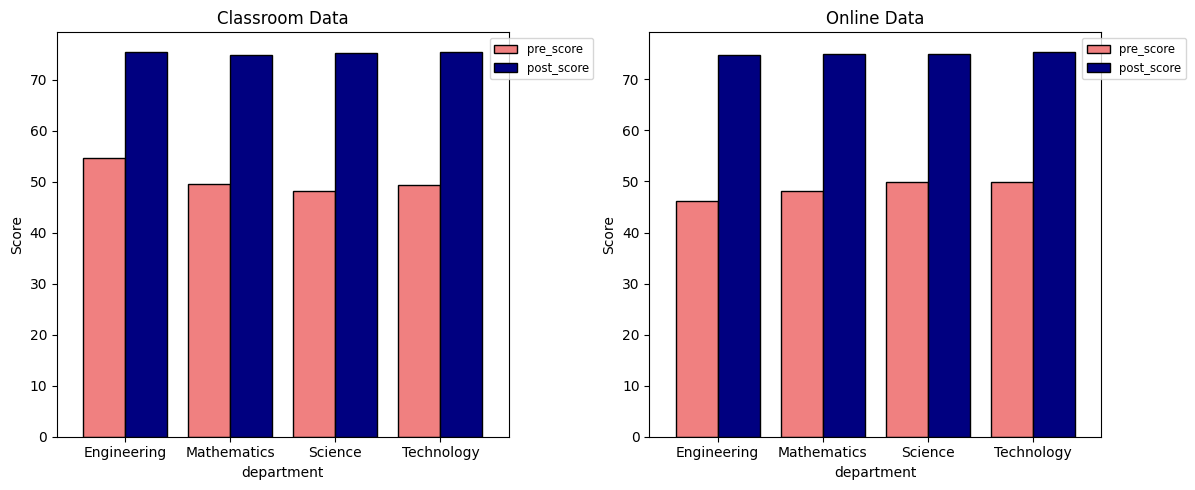

In [44]:
# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
# Plot for classroom data
classroom_mean_scores.plot(kind='bar', ax=ax1, width=0.8, edgecolor='black', color=colors)
ax1.set_title('Classroom Data')
ax1.set_ylabel('Score')
ax1.set_xticklabels(classroom_mean_scores.index, rotation=0)  # Adjust x tick labels with rotation

online_mean_scores.plot(kind='bar', ax=ax2, width=0.8, edgecolor='black', color=colors)
ax2.set_title('Online Data')
ax2.set_ylabel('Score')
ax2.set_xticklabels(online_mean_scores.index, rotation=0)  # Adjust x tick labels with rotation

# Customize legend size and rotation
ax1.legend(fontsize='small', loc='upper right', bbox_to_anchor=(1.2, 1))
ax2.legend(fontsize='small', loc='upper right', bbox_to_anchor=(1.2, 1))


plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.tight_layout()
plt.show()

- From the above plot we can see that both type of courses i.e classroom and online have succeeded in improving the results of the enrolled students.
- As in both plots we can clearly see that post-score has increased for every deaprtment whether the course type is classroom or online.
- So from the above plot we infer that both course types succeeds in improving the result of students.

### **Visualizing Beginner and Intermediate level courses availibility in every department**

Now let's visualize the amount of courses being offered  in different departments based on pre_requirement level.
- For this I have made four dataframes two are from the classroom data and two are from the online data.
- I have subset the beginner and intermediate level courses separatley for both classroom and online courses.
- And then counted the number of courses available for each subset.
- While we are making pie chart, so I have calcualted the percentage against each count.

In [45]:
# subset all entries with course_type = clasroom and pre_requirement = Beginner
beginner_classroom_data = classroom_data[classroom_data['pre_requirement'] == 'Beginner']
beginner_counts_classroom = beginner_classroom_data['department'].value_counts(normalize=True) * 100
beginner_counts_classroom.head()

department
Science        36.254980
Engineering    21.513944
Mathematics    21.513944
Technology     20.717131
Name: proportion, dtype: float64

In [46]:
intermediate_classroom_data = classroom_data[classroom_data['pre_requirement'] == 'Intermediate']
intermediate_counts_classroom = intermediate_classroom_data['department'].value_counts(normalize=True) * 100
intermediate_counts_classroom.head()

department
Science        38.839286
Engineering    31.696429
Mathematics    16.071429
Technology     13.392857
Name: proportion, dtype: float64

In [47]:
beginner_online_data = online_data[online_data['pre_requirement'] == 'Beginner']
beginner_counts_online = beginner_online_data['department'].value_counts(normalize=True) * 100
beginner_counts_online.head()

department
Technology     49.671362
Mathematics    24.037559
Science        20.281690
Engineering     6.009390
Name: proportion, dtype: float64

In [48]:
intermediate_online_data = online_data[online_data['pre_requirement'] == 'Intermediate']
intermediate_counts_online = intermediate_online_data['department'].value_counts(normalize=True) * 100
intermediate_counts_online.head()

department
Technology     34.838710
Mathematics    30.322581
Science        25.161290
Engineering     9.677419
Name: proportion, dtype: float64

- Now that we have made separate dataframes four the coures count in every department for beginer and intermediate courses.
- Now we will make pie chart for all four dataframes.
- Before making a pie chart I have declared a dict for the colurs of every segment of pie chart. I want that all four pe charts should have same colour for example if Engineering segment in first pie plot has blue colour then it should have same colour in other three pie charts.

In [49]:
department_colors = {
    'Science': 'plum',
    'Engineering': 'lightskyblue',
    'Mathematics': 'peachpuff',
    'Technology': 'pink'
}

Now we make te pie charts.
- I am assigning the colours using this code:
    
    colors = [department_colors.get(dep, 'gray') for dep in beginner_counts_classroom.index]
    
    **Get Color:** For each department (dep), it looks up the corresponding color in the department_colors dictionary using the get method.
   
   **Default Color:** If a department is not found in the department_colors dictionary, the get method returns the default color 'gray'.
   
- Also I wanted a universal legend for all plot for which i followed following steps:
   
   **1. Create Legend Handles**: Use list comprehension to create rectangles (plt.Rectangle). Each rectangle has a position (0,0), size (1,1), and color from department_colors.
   
   **2. Create Legend Labels:** Extract keys from department_colors to create labels.
   
   **3. Add Legend to Figure**

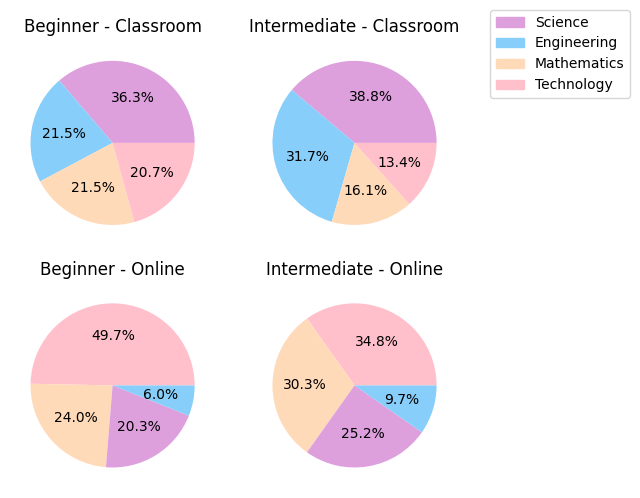

In [50]:
# Create subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(5, 5))

# Plot for beginner - Classroom
ax1.pie(beginner_counts_classroom, autopct='%1.1f%%', 
        colors=[department_colors.get(dep, 'gray') for dep in beginner_counts_classroom.index])
ax1.set_title('Beginner - Classroom')

# Plot for intermediate - Classroom
ax2.pie(intermediate_counts_classroom, autopct='%1.1f%%',  
        colors=[department_colors.get(dep, 'gray') for dep in intermediate_counts_classroom.index])
ax2.set_title('Intermediate - Classroom')

# Plot for beginner - Online
ax3.pie(beginner_counts_online, autopct='%1.1f%%',
        colors=[department_colors.get(dep, 'gray') for dep in beginner_counts_online.index])
ax3.set_title('Beginner - Online')

# Plot for intermediate - Online
ax4.pie(intermediate_counts_online, autopct='%1.1f%%',  
        colors=[department_colors.get(dep, 'gray') for dep in intermediate_counts_online.index])
ax4.set_title('Intermediate - Online')

# Create a single legend for all plots
handles = [plt.Rectangle((0,0),1,1, color=department_colors.get(dep, 'gray')) for dep in department_colors]
labels = list(department_colors.keys())
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

From the above plot we can clearly see that:
- In the technology department more courses are being offered online than classroom. That can be a reason why less students are enrolling in Technology department for classroom classes.
- But for the Engineering department less courses are offered online, so more students are getting enrolled in online courses.
- Same trends can be seen for Maths and Science department.

That was all from the data analysis and visualization part.
Now let's conclude our study and draw some conclusions from our analysis

---
## **CONCLUSION**
- Course type is a significant factor in analyzing the enrollment of students.
- Over the years from 2011 to 2022 the enrollment in online courses is more than the enrollment in classroom courses. More students are getting enrolled for online courses.
- The courses in the department of Technology and Mathematics are mostly being studied online.
- Whereas courses of department Science and Engineering and mostly being enrolled by the students who want to learn on-campus.
- One more key insight is that university is offering more online courses for technology and maths. That can be a reason of the high enrollment of students in online courses for these departments.
- Similarly the courses that fall in the department of Engineering and Science are mostly offered oncampus, thats why their enrollment is highter as compared to online.
- Also in both type of courses an increasing trend is seen in the postscore for all departments, that means university is succeeding in providing required knowledge to students whether the course type is classroom or online.